# Install Library



In [5]:
# install nessecery library

import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Import Data

In [6]:
df = pd.read_csv('/content/latency.csv')   # import data from .csv
df.head()

,time,icmp_success,ip_management,ip_version,latency,subscription_id
0,2019-07-13 15:15:00,1,178.128.58.160,4,0.0027,247
1,2019-07-13 15:20:00,1,178.128.58.160,4,0.0072,247
2,2019-07-13 15:25:00,1,178.128.58.160,4,0.0128,247
3,2019-07-13 15:30:00,1,178.128.58.160,4,0.0146,247
4,2019-07-13 15:35:00,1,178.128.58.160,4,0.0130,247


# EDA

In [7]:
# preview and dimensions of dataset
df.shape

(364714, 6)

interpretation:
1. there are 6 variables and 364714 data for each

In [8]:
# preview dataset
df

,time,icmp_success,ip_management,ip_version,latency,subscription_id
0,2019-07-13 15:15:00,1,178.128.58.160,4,0.0027,247
1,2019-07-13 15:20:00,1,178.128.58.160,4,0.0072,247
2,2019-07-13 15:25:00,1,178.128.58.160,4,0.0128,247
3,2019-07-13 15:30:00,1,178.128.58.160,4,0.0146,247
4,2019-07-13 15:35:00,1,178.128.58.160,4,0.0130,247
...,...,...,...,...,...,...
364709,2022-12-30 23:40:00,1,178.128.58.160,4,0.0141,247
364710,2022-12-30 23:45:00,1,178.128.58.160,4,0.0129,247
364711,2022-12-30 23:50:00,1,178.128.58.160,4,0.0079,247
364712,2022-12-30 23:55:00,1,178.128.58.160,4,0.0044,247


interpretation:
1. the data will always increase every 5 minutes
2. the data that will be used is only latency data from **ip_management = 178.128.58.160** and **subscription_id = 247**

In [9]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364714 entries, 0 to 364713
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             364714 non-null  object 
 1   icmp_success     364714 non-null  int64  
 2   ip_management    364714 non-null  object 
 3   ip_version       364714 non-null  int64  
 4   latency          364714 non-null  float64
 5   subscription_id  364714 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 16.7+ MB


interpretation:
1. there are no missing-values
2. time variable has an object data type, the variable needs to be converted into time format and used as an index

## Descriptive Stats

In [10]:
# df.describe(include='all')
df[['latency']].describe()

,latency
count,364714.000000
mean,0.114937
std,0.069520
min,0.000000
25%,0.058200
50%,0.110400
75%,0.163500
max,0.372800


interpretation:
1. the number of data latency is 364.714
2. the largest latency data value is **0.372800** and the smallest is **0.000000**
3. the range of latency data is betwwen 0 and 1, so it doesnt need to be scaled
4. the average latency is **0.114937 (s) / 114.937 (ms)**, according to TIPHON, the average latency can be categorized as **very good**


*note*:
1. 1s = 1000ms
2. TIPHON, Very Good --> < 150ms

## Latency Viz

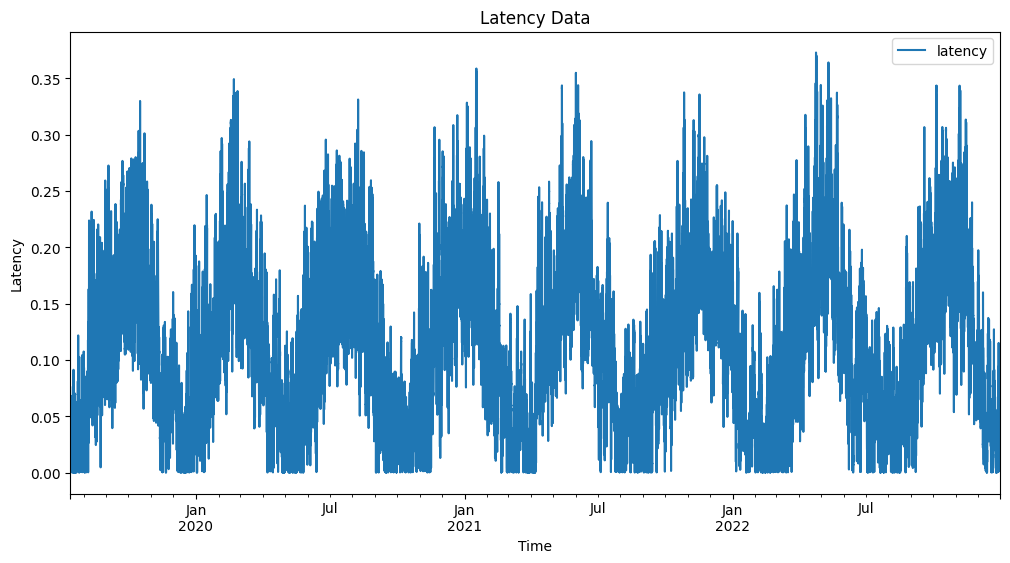

In [11]:
df.index = pd.to_datetime(df['time'], format='%Y.%m.%d %H:%M:%S')  # change index and set time format

# show all latency
plt.figure(figsize=(12, 6))
df['latency'].plot()   # the whole data
plt.xlabel('Time')
plt.ylabel('Latency')
plt.title('Latency Data')
plt.legend()
plt.show()

interpretation:
1. The data appears to have seasonality
2. The data has a value more than 0

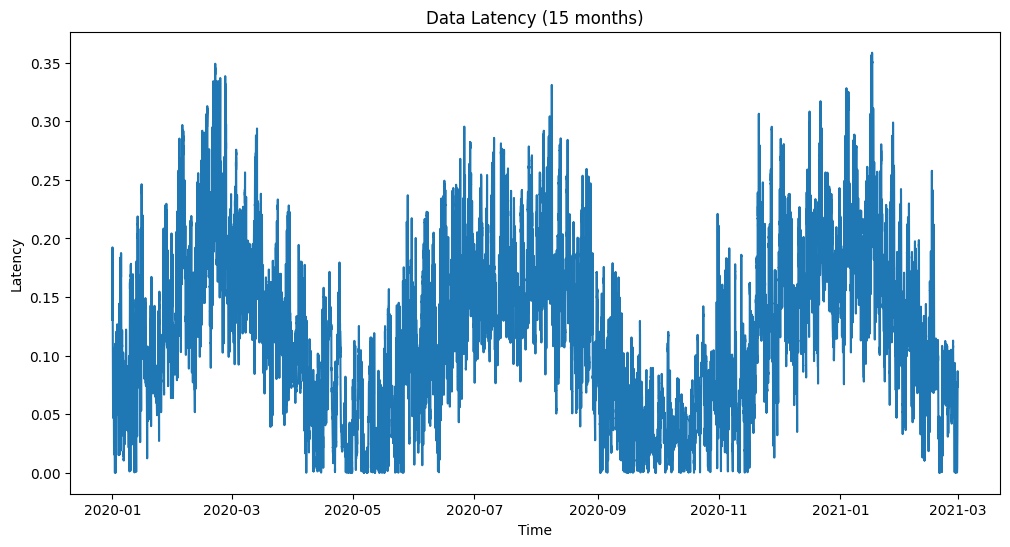

In [12]:
# set start and end time
start_date = '2020-01-01 00:00:00'
end_date = '2021-03-01 00:00:00'
filtered_data = df[(df.index >= start_date) & (df.index <= end_date)]

plt.figure(figsize=(12, 6))
plt.plot(filtered_data['latency'])
plt.xlabel('Time')
plt.ylabel('Latency')
plt.title('Data Latency (15 months)')
plt.show()

interpretation:
1. it seems like the latency data has a pattern of once in every 5 months, so we need to take the stationarity test to find out the data stationary or not

## Stationarity Test

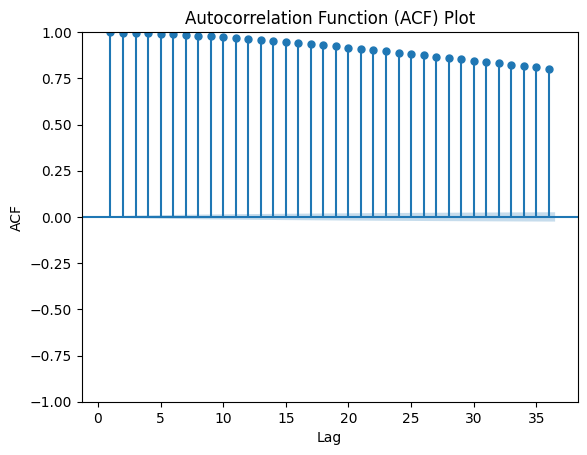

In [90]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plot the ACF with zero=False to display only the ACF plot
sm.graphics.tsa.plot_acf(df['latency'], lags=36, zero=False)

# Add labels and title if needed
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF) Plot')

# Show the plot
plt.show()

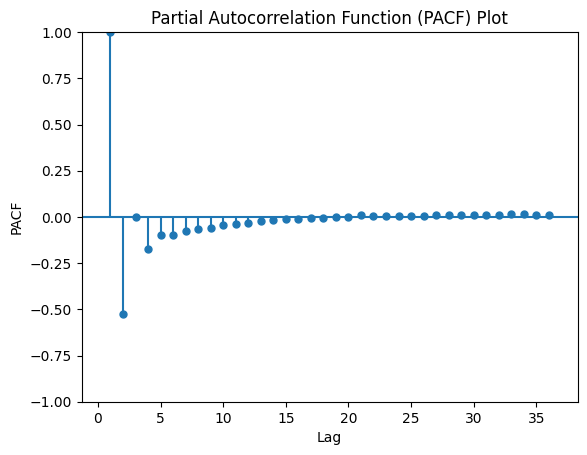

In [91]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plot the PACF with zero=False to display only the PACF plot
sm.graphics.tsa.plot_pacf(df['latency'], lags=36, zero=False)

# Add labels and title if needed
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF) Plot')

# Show the plot
plt.show()

In [92]:
from statsmodels.tsa.stattools import adfuller

# Assuming you have a time series in a pandas Series or DataFrame
stat_test = adfuller(df['latency'][:100000])

# Extract and print the ADF test statistics and p-value
adf_statistic = stat_test[0]
p_value = stat_test[1]
print(f'ADF Statistic: {adf_statistic:.2f}')
print(f'p-value: {p_value:.2f}')

# Check the p-value against a significance level (e.g., 0.05) to make a decision
if p_value <= 0.05:
    print("Reject the null hypothesis (stationary)")
else:
    print("Fail to reject the null hypothesis (non-stationary)")


ADF Statistic: -10.42
p-value: 0.00
Reject the null hypothesis (stationary)


# Pre-Processing

## Data Cleaning

In [13]:
df = df[['time', 'latency']]   # select data to be used
df.index = pd.to_datetime(df['time'], format='%Y.%m.%d %H:%M:%S')   # change format and set index for the time
df

,time,latency
time,,
2019-07-13 15:15:00,2019-07-13 15:15:00,0.0027
2019-07-13 15:20:00,2019-07-13 15:20:00,0.0072
2019-07-13 15:25:00,2019-07-13 15:25:00,0.0128
2019-07-13 15:30:00,2019-07-13 15:30:00,0.0146
2019-07-13 15:35:00,2019-07-13 15:35:00,0.0130
...,...,...
2022-12-30 23:40:00,2022-12-30 23:40:00,0.0141
2022-12-30 23:45:00,2022-12-30 23:45:00,0.0129
2022-12-30 23:50:00,2022-12-30 23:50:00,0.0079


## Split Data

In [16]:
x = mdates.date2num(df.index)
y = df['latency']

train_size = int(len(df) * 0.8)  # define train:test data (ex: 80:20)

x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(291771,) (72943,)
(291771,) (72943,)


## Sequencing Data

In [19]:
def windowing(df, window_size):
  x = []
  y = []

  for i in range(len(df) - window_size):
    x_result = df[i:i+window_size].to_list()
    x.append(x_result)
    y_result = df[i+window_size]
    y.append(y_result)

  return np.array(x), np.array(y)

In [20]:
window_size = 30

x_train_lstm, y_train_lstm = windowing(y_train, window_size)
x_test_lstm, y_test_lstm = windowing(y_test, window_size)

# LSTM Model

## LSTM Architecture

In [26]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# build lstm model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(window_size, 1)))
lstm_model.add(Dense(8))
lstm_model.add(Dense(1))
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Hyperparameter Tuning

In [27]:
cp = ModelCheckpoint('model/', save_best_only=True)
lstm_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=RootMeanSquaredError())

## Training Model

In [28]:
# train lstm model
history = lstm_model.fit(x_train_lstm, y_train_lstm, validation_data=(x_test_lstm, y_test_lstm), epochs=25, batch_size=128, callbacks=[cp])

Epoch 1/25
2280/2280 [==============================] - 111s 47ms/step - loss: 2.3005e-04 - root_mean_squared_error: 0.0152 - val_loss: 3.3919e-05 - val_root_mean_squared_error: 0.0058
Epoch 2/25
2280/2280 [==============================] - 106s 46ms/step - loss: 2.8030e-05 - root_mean_squared_error: 0.0053 - val_loss: 2.0633e-05 - val_root_mean_squared_error: 0.0045
Epoch 3/25
2280/2280 [==============================] - 107s 47ms/step - loss: 1.8266e-05 - root_mean_squared_error: 0.0043 - val_loss: 1.5558e-05 - val_root_mean_squared_error: 0.0039
Epoch 4/25
2280/2280 [==============================] - 105s 46ms/step - loss: 1.3057e-05 - root_mean_squared_error: 0.0036 - val_loss: 1.0535e-05 - val_root_mean_squared_error: 0.0032
Epoch 5/25
2280/2280 [==============================] - 107s 47ms/step - loss: 1.0061e-05 - root_mean_squared_error: 0.0032 - val_loss: 8.3431e-06 - val_root_mean_squared_error: 0.0029
Epoch 6/25
2280/2280 [==============================] - 105s 46ms/step - lo

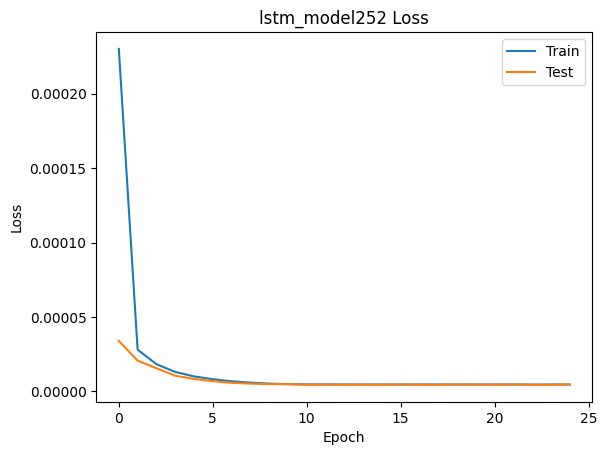

In [29]:
# plot train and test loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('lstm_model252 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [30]:
loss_df = pd.DataFrame({'loss': history.history['loss'], 'val_loss': history.history['val_loss']})
loss = pd.DataFrame({'min': loss_df.min(), 'max': loss_df.max()})
loss
print(loss_df.min())

loss        0.000005
val_loss    0.000004
dtype: float64


## LSTM Prediction

In [31]:
# load lstm model
from tensorflow.keras.models import load_model
lstm_model = load_model('model/')

# Evaluation

In [33]:
train_predictions = lstm_model.predict(x_train_lstm).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train_lstm})
train_results

9117/9117 [==============================] - 53s 6ms/step


,Train Predictions,Actuals
0,0.037174,0.0369
1,0.038243,0.0375
2,0.038582,0.0392
3,0.040839,0.0419
4,0.043807,0.0433
...,...,...
291736,0.139456,0.1410
291737,0.141203,0.1414
291738,0.141158,0.1417
291739,0.141647,0.1407


In [34]:
# Your specified start time
start_time = pd.to_datetime('2019-07-13 17:45:00')  # Replace with your desired start time

# Calculate the time intervals
num_samples = len(train_results)
time_intervals = [start_time + pd.Timedelta(minutes=5 * i) for i in range(num_samples)]

# Add the "time" column to the DataFrame
train_results['Time'] = time_intervals

# Print the updated DataFrame
# print(train_results)

# Calculate MAPE (Mean Absolute Percentage Error) between Actuals and Train Predictions
train_results['Loss'] = (abs(train_results['Actuals'] - train_results['Train Predictions']) / train_results['Actuals']) * 100

# Print the updated DataFrame
train_results

,Train Predictions,Actuals,Time,Loss
0,0.037174,0.0369,2019-07-13 17:45:00,0.741885
1,0.038243,0.0375,2019-07-13 17:50:00,1.982216
2,0.038582,0.0392,2019-07-13 17:55:00,1.577251
3,0.040839,0.0419,2019-07-13 18:00:00,2.533363
4,0.043807,0.0433,2019-07-13 18:05:00,1.170737
...,...,...,...,...
291736,0.139456,0.1410,2022-04-21 17:05:00,1.095033
291737,0.141203,0.1414,2022-04-21 17:10:00,0.139078
291738,0.141158,0.1417,2022-04-21 17:15:00,0.382572
291739,0.141647,0.1407,2022-04-21 17:20:00,0.673304


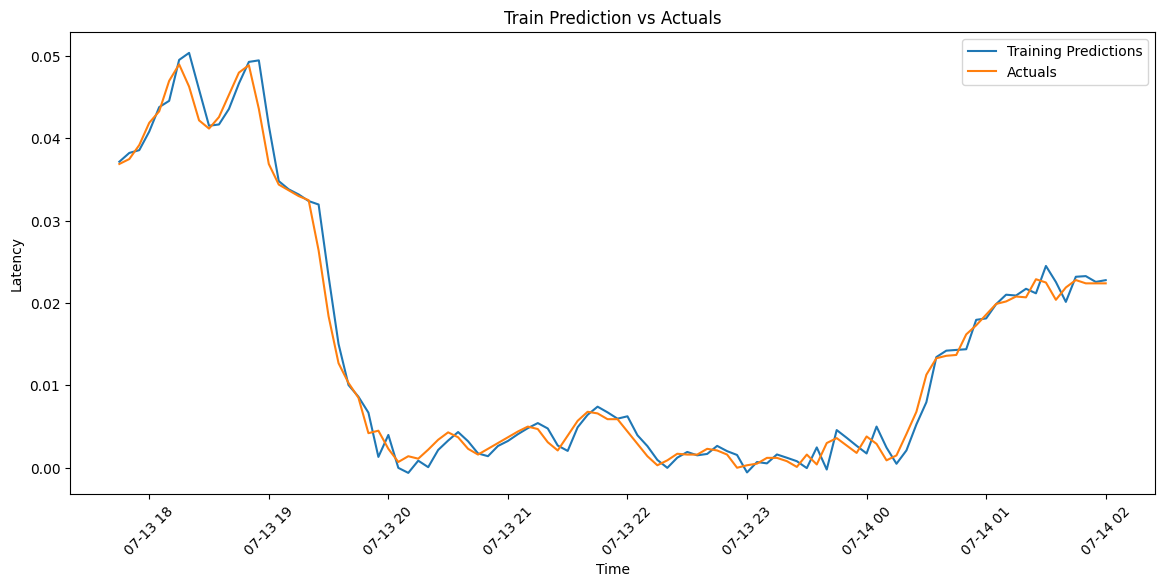

In [37]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(14, 6))

# Set the x-axis as the "Time" column
time_index = train_results['Time'][:100]

# Plot the data using the time index
plt.plot(time_index, train_results['Train Predictions'][:100])
plt.plot(time_index, train_results['Actuals'][:100])

# Add legends, title, and labels
plt.legend(['Training Predictions', 'Actuals'])
plt.title('Train Prediction vs Actuals')
plt.ylabel('Latency')
plt.xlabel('Time')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [38]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Filter out data points with zero actual values
non_zero_data = train_results[train_results['Actuals'] != 0]

# Calculate MAPE for the filtered data
abs_percentage_error = np.abs((non_zero_data['Actuals'] - non_zero_data['Train Predictions']) / non_zero_data['Actuals'])
mape = np.mean(abs_percentage_error) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Accuracy of prediction: {100 - mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 3.15%
Accuracy of prediction: 96.85%


In [39]:
test_predictions = lstm_model.predict(x_test_lstm).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test_lstm})

test_results

2279/2279 [==============================] - 13s 6ms/step


,Test Predictions,Actuals
0,0.237856,0.2357
1,0.237371,0.2361
2,0.237772,0.2377
3,0.239715,0.2402
4,0.242349,0.2400
...,...,...
72908,0.015232,0.0141
72909,0.012165,0.0129
72910,0.011750,0.0079
72911,0.004828,0.0044


In [40]:
# Your specified start time
start_time = pd.to_datetime('2022-04-21 20:00:00')  # Replace with your desired start time

# Calculate the time intervals
num_samples = len(test_results)
time_intervals = [start_time + pd.Timedelta(minutes=5 * i) for i in range(num_samples)]

# Add the "time" column to the DataFrame
test_results['Time'] = time_intervals

# Print the updated DataFrame
# print(train_results)

# Calculate MAPE (Mean Absolute Percentage Error) between Actuals and Train Predictions
test_results['Loss'] = (abs(test_results['Actuals'] - test_results['Test Predictions']) / test_results['Actuals']) * 100
test_results

,Test Predictions,Actuals,Time,Loss
0,0.237856,0.2357,2022-04-21 20:00:00,0.914634
1,0.237371,0.2361,2022-04-21 20:05:00,0.538438
2,0.237772,0.2377,2022-04-21 20:10:00,0.030448
3,0.239715,0.2402,2022-04-21 20:15:00,0.201787
4,0.242349,0.2400,2022-04-21 20:20:00,0.978712
...,...,...,...,...
72908,0.015232,0.0141,2022-12-30 23:40:00,8.030129
72909,0.012165,0.0129,2022-12-30 23:45:00,5.696103
72910,0.011750,0.0079,2022-12-30 23:50:00,48.735646
72911,0.004828,0.0044,2022-12-30 23:55:00,9.731304


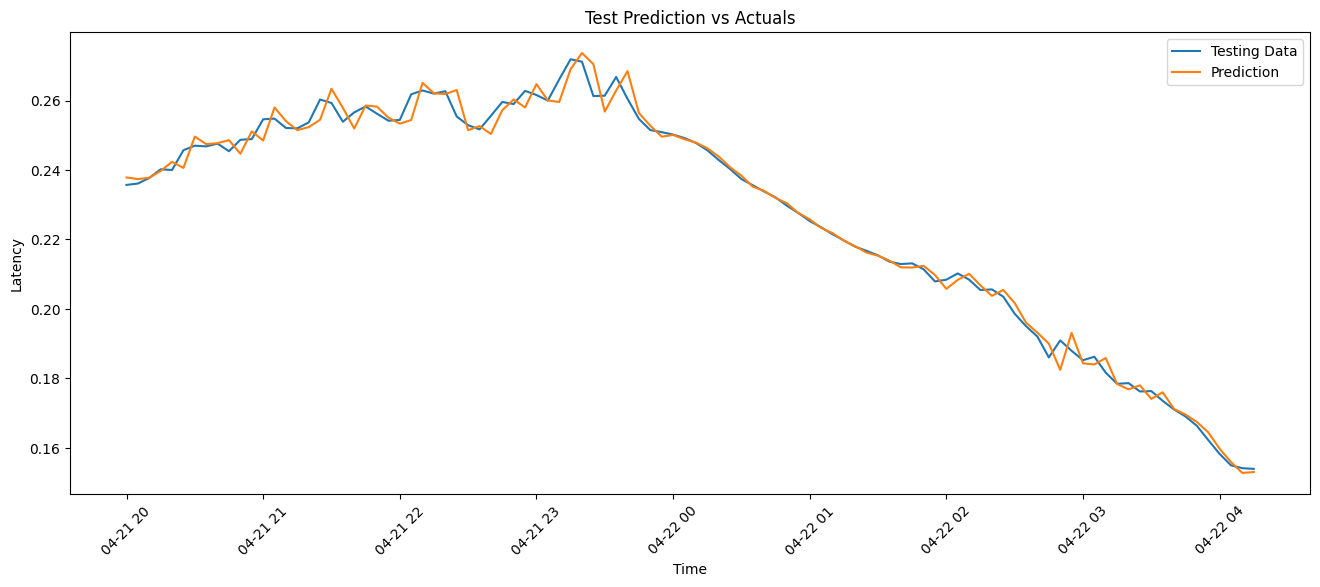

In [41]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(16, 6))

# Set the x-axis as the "Time" column
time_index = test_results['Time'][:100]

# Plot the data using the time index
plt.plot(time_index, test_results['Actuals'][:100])
plt.plot(time_index, test_results['Test Predictions'][:100])



# Add legends, title, and labels
plt.legend(['Testing Data', 'Prediction'])
plt.title('Test Prediction vs Actuals')
plt.ylabel('Latency')
plt.xlabel('Time')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [43]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Filter out data points with zero actual values
non_zero_data = test_results[test_results['Actuals'] != 0]

# Calculate MAPE for the filtered data
abs_percentage_error = np.abs((non_zero_data['Actuals'] - non_zero_data['Test Predictions']) / non_zero_data['Actuals'])
mape = np.mean(abs_percentage_error) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Accuracy of prediction: {100 - mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 2.77%
Accuracy of prediction: 97.23%


In [87]:
import numpy as np
import pandas as pd

starttime = pd.Timestamp("2022-12-31 00:05:00")
endtime = pd.Timestamp("2023-06-30 23:55:00")

# Calculate the number of time steps with a 5-minute interval
six_months_time = pd.date_range(start=starttime, end=endtime, freq='5T')

# prepare the latency data
num_predictions = len(six_months_time)
last_data_points = df.tail(num_predictions)
input_sequence = np.array(last_data_points['latency']).reshape(num_predictions, 1)

# predict the latency
predicted_latency = lstm_model.predict(input_sequence)
predicted_values = predicted_latency.flatten()

# create time index
last_time_points = df['time'].tail(num_predictions)
last_time = pd.to_datetime(last_time_points.iloc[-1])
start_time = last_time + pd.Timedelta(minutes=5)
new_time_index = pd.date_range(start=start_time, periods=num_predictions, freq='5T')

# create a dataframe for the predicted values with the new time index
predict = pd.DataFrame({'prediction': predicted_values}, index=new_time_index)
predict['prediction'][predict['prediction'] < 0] = 0
predict['prediction'] = predict['prediction'].iloc[::-1].values

# Load the next latency data from the CSV file
next_latency = pd.read_csv('/content/6months.csv')

# Set the index of next_latency to be the same as the index of predict
next_latency = next_latency.set_index(predict.index)

# Combine the two dataframes using concat
compare = pd.concat([next_latency, predict], axis=1)
compare

1638/1638 [==============================] - 4s 3ms/step


,actual,prediction
2022-12-31 00:05:00,0.000000,0.005160
2022-12-31 00:10:00,0.000000,0.008073
2022-12-31 00:15:00,0.004418,0.013174
2022-12-31 00:20:00,0.011274,0.020464
2022-12-31 00:25:00,0.012921,0.022215
...,...,...
2023-06-30 23:35:00,0.159355,0.177536
2023-06-30 23:40:00,0.161871,0.180198
2023-06-30 23:45:00,0.164387,0.182861
2023-06-30 23:50:00,0.166485,0.185081


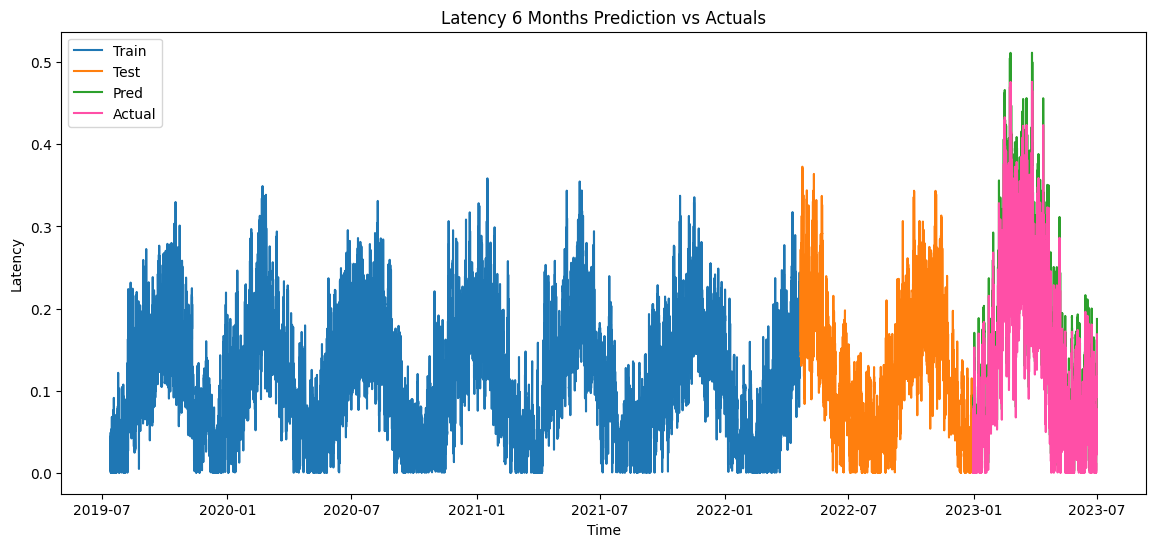

In [88]:
# visualize latency predictions
plt.figure(figsize=(14,6))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(compare['prediction'], label='Pred')
plt.plot(compare['actual'], label='Actual', color='#FF4FA7')
plt.title('Latency 6 Months Prediction vs Actuals')
plt.ylabel('Latency')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.show()